# Auto-MPG
---

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Download the data

In [2]:
df = pd.read_csv('files/datasets/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Take a Quick Look at the Data

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


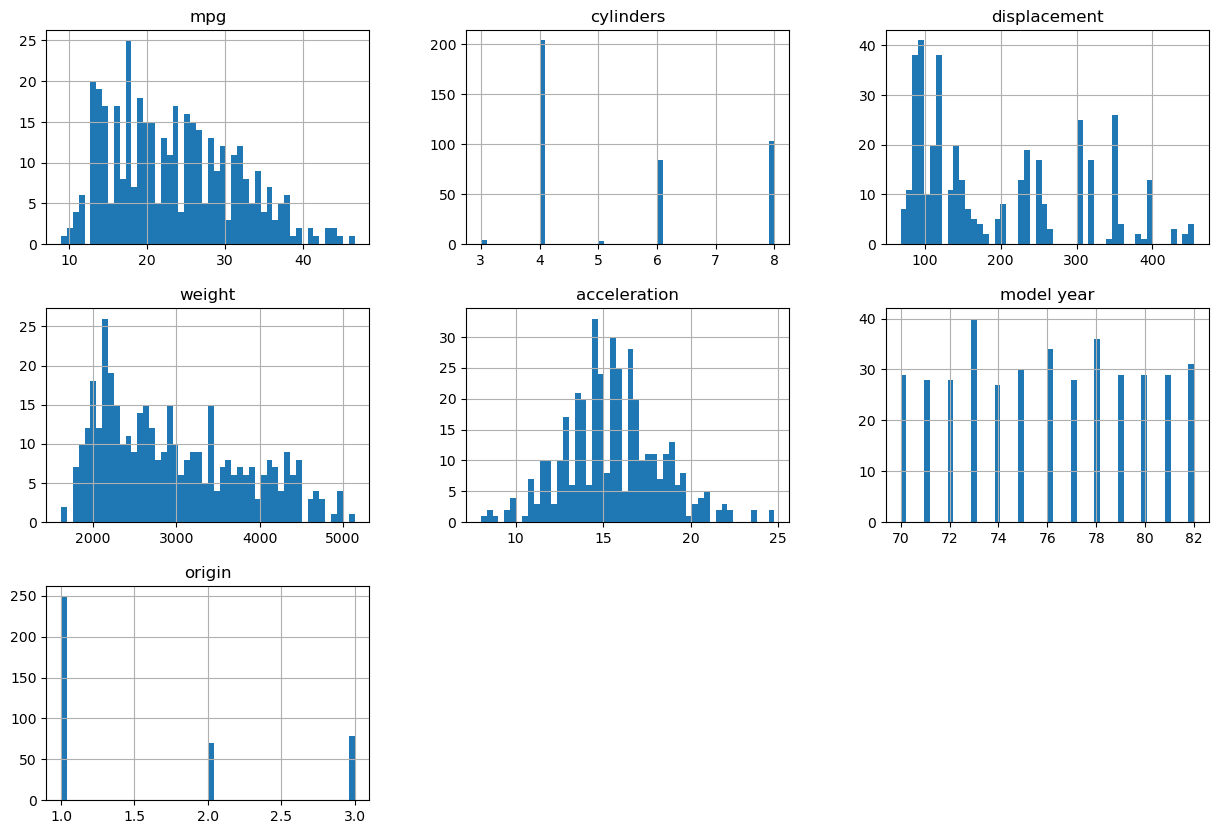

In [5]:
df.hist(bins=50, figsize=(15,10))
plt.show()

## Pandas Pipeline

In [6]:
# Pipe 1

def num_prefix(dataframe, str_column):
    
    # Apply function if the year is not in 19-- format    
    if (dataframe[str_column] < 1000).all():
        
        # Apply prefix concatenation to the number   
        dataframe[str_column] = dataframe[str_column].apply(lambda x: 1900 + x)
    
    else:
        pass
    
    return dataframe 

In [7]:
# Pipe 2

def first_word_extract(dataframe, column, new_colname):
    
    # Change data type into string
    dataframe[column] = dataframe[column].astype('str')
    
    # Split converted string and store it in a series
    col_data = pd.Series(dtype='object')
    col_data['phrase_aslist'] = dataframe[column].str.split()
    
    # Retrieve the first content in the splitted phrase contained as a list
    dataframe[new_colname] = col_data['phrase_aslist'].apply(lambda words_aslist: words_aslist[0])
    
    return dataframe

In [8]:
df_pipe = (df.pipe(num_prefix, 'model year')
             .pipe(first_word_extract, 'car name', 'car brand')
          )

In [9]:
df_pipe['car brand'].value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: car brand, dtype: int64

In [10]:
rename_dict= {'toyouta': 'toyota', 
              'maxda': 'mazda', 
              'chevroelt': 'chevrolet', 
              'vw': 'volkswagen',
              'vokswagen': 'volkswagen', 
              'chevy': 'chevrolet', 
              'mercedes': 'mercedes-benz',
              'capri': 'ford'}

df_pipe['car brand'] = df_pipe['car brand'].replace(rename_dict)

df_remove = df_pipe[df_pipe['car brand'].isin(['nissan', 'hi', 'triumph'])]
df_pipe = df_pipe.drop(df_remove.index)

In [11]:
df_pipe['car brand'].value_counts()

ford             52
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
renault           5
saab              4
opel              4
subaru            4
mercedes-benz     3
bmw               2
cadillac          2
Name: car brand, dtype: int64

----

### Split data as stratified

In [12]:
df_pipe["mpg_cat"] = pd.cut(df_pipe["mpg"],
                       bins=[0, 20, 30, 40, np.inf],
                       labels=['Poor', 'Fair', 'Good', 'Excellent'])

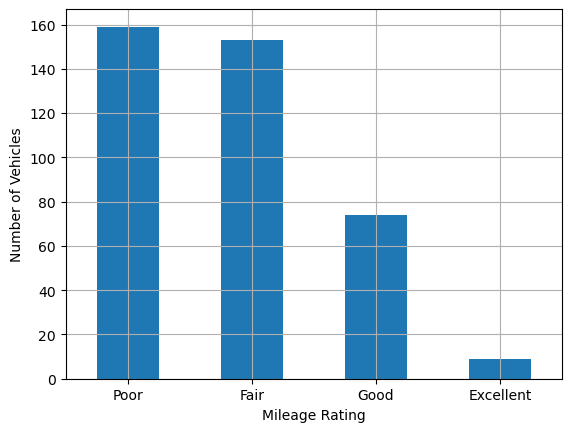

In [13]:
def plot_bins(dataframe, cat_column, x_axis_name, y_axis_name):
    
    cat_count = dataframe[cat_column].value_counts()
    cat_count.sort_index().plot.bar(rot=0, grid=True)
    
    plt.xlabel(x_axis_name)
    plt.ylabel(y_axis_name)
    
    return plt.show()

plot_bins(df_pipe, 'mpg_cat', 'Mileage Rating', 'Number of Vehicles')

In [14]:
strat_train_set, strat_test_set = train_test_split(df_pipe, test_size=0.2, stratify=df_pipe["mpg_cat"], random_state=42)

# Check stratification of splitted data
strat_test_set["mpg_cat"].value_counts() / len(strat_test_set)

# Check stratification of original data
# df["mpg_cat"].value_counts() / len(df)

Poor         0.405063
Fair         0.379747
Good         0.189873
Excellent    0.025316
Name: mpg_cat, dtype: float64

In [15]:
mpg_df = strat_train_set.copy()

---
### Pipe 1

In [16]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car brand,mpg_cat
68,13.0,8,350.0,155,4502,13.5,1972,1,buick lesabre custom,buick,Poor
236,25.5,4,140.0,89,2755,15.8,1977,1,ford mustang ii 2+2,ford,Fair
307,26.8,6,173.0,115,2700,12.9,1979,1,oldsmobile omega brougham,oldsmobile,Fair
152,19.0,6,225.0,95,3264,16.0,1975,1,plymouth valiant custom,plymouth,Poor
374,23.0,4,151.0,?,3035,20.5,1982,1,amc concord dl,amc,Fair


In [17]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 68 to 188
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           316 non-null    float64 
 1   cylinders     316 non-null    int64   
 2   displacement  316 non-null    float64 
 3   horsepower    316 non-null    object  
 4   weight        316 non-null    int64   
 5   acceleration  316 non-null    float64 
 6   model year    316 non-null    int64   
 7   origin        316 non-null    int64   
 8   car name      316 non-null    object  
 9   car brand     316 non-null    object  
 10  mpg_cat       316 non-null    category
dtypes: category(1), float64(3), int64(4), object(3)
memory usage: 27.7+ KB


In [18]:
mpg_df['weight'] = mpg_df['weight'].astype('float64')

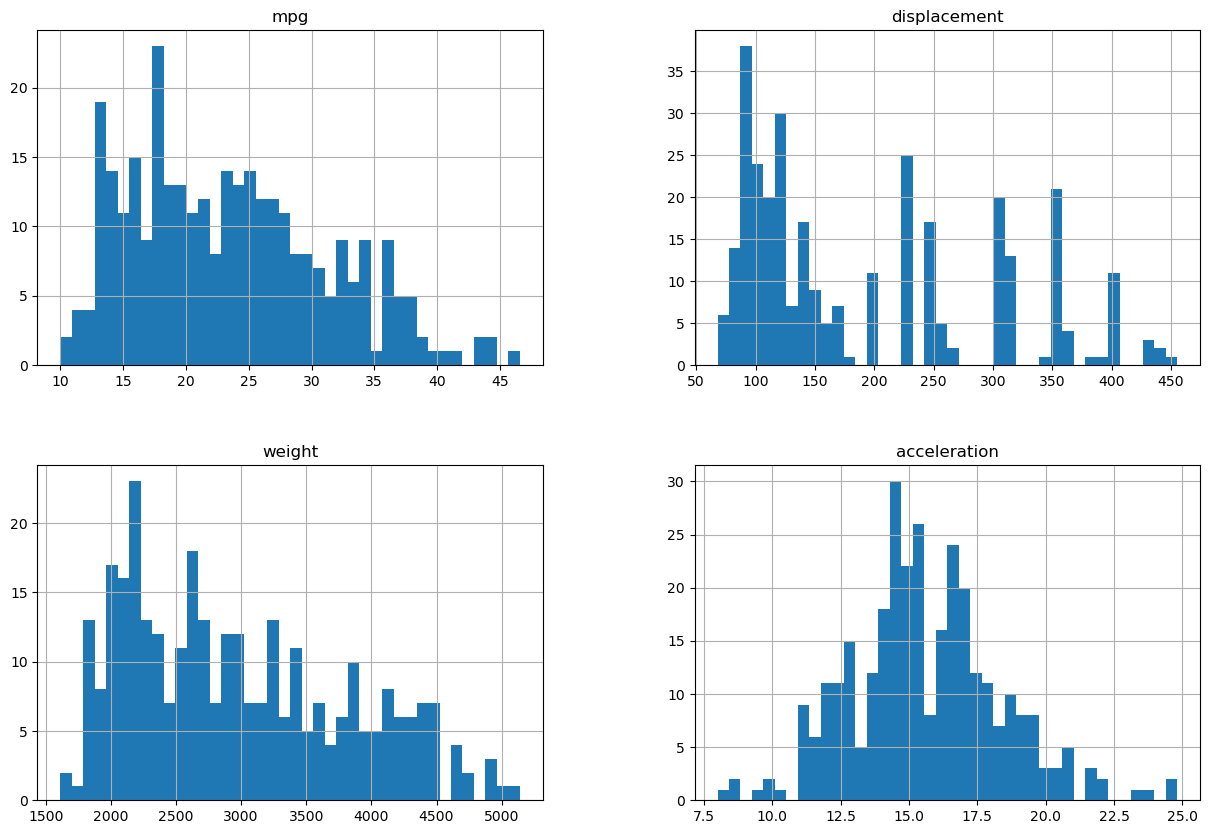

In [19]:
mpg_df.select_dtypes(include='float64').hist(bins=40, figsize=(15,10))
plt.show()

In [20]:
for i in mpg_df.select_dtypes(include='float64'):
    print(f'Skeweness of {mpg_df[i].skew().round(5)} for {i}')

Skeweness of 0.50096 for mpg
Skeweness of 0.68731 for displacement
Skeweness of 0.52333 for weight
Skeweness of 0.34052 for acceleration


In [21]:
import pandas as pd

def impute_central_tendency(dataframe, column):
    central_tendency = ["mean", "median", "mode"]
    impute_df = pd.DataFrame()
    impute_column = dataframe[column]
    
    # Impute null values using cental tendency
    for stat in central_tendency:
        if stat == "mode":
            impute_df[stat] = eval(f"impute_column.fillna(value=impute_column.mode()[0])")
        else:
            impute_df[stat] = eval(f"impute_column.fillna(value=impute_column.{stat}())")
            
    # Round all answers to nearest integer
    round_impute = impute_df.round(0).astype(int)
    
    return round_impute

In [22]:
def skew(dataframe):
    # Create a dataframe with index names
    df = pd.DataFrame(index=['mean', 'median', 'mode'])

    # Columns to the dataframe
    df['raw_skew'] = [dataframe[i].skew() for i in dataframe.columns]
    df['log_skew'] = [dataframe[i].apply(np.log).skew() for i in dataframe.columns]
    df['sqrt_skew'] = [dataframe[i].apply(np.sqrt).skew() for i in dataframe.columns]
    df['cbrt_skew'] = [dataframe[i].apply(np.cbrt).skew() for i in dataframe.columns]
    df['log1p_skew'] = [dataframe[i].apply(np.log1p).skew() for i in dataframe.columns]

    return df

# Argument must be a dataframe that contains mean, median and mode as the columns

In [23]:
new = skew(impute_central_tendency(mpg_df, 'mpg'))
new

,raw_skew,log_skew,sqrt_skew,cbrt_skew,log1p_skew
mean,0.502831,-0.095154,0.203351,0.10396,-0.068121
median,0.502831,-0.095154,0.203351,0.10396,-0.068121
mode,0.502831,-0.095154,0.203351,0.10396,-0.068121


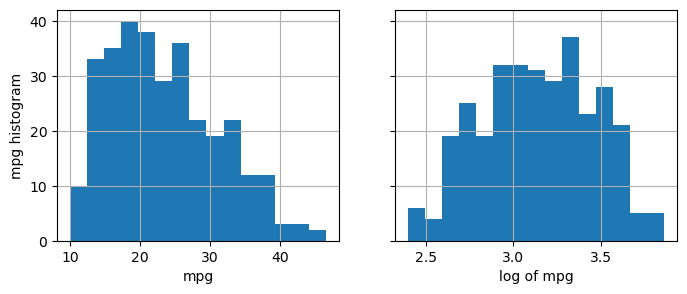

In [24]:
params = {'dataframe':         mpg_df,
          'column':            'mpg',
          'bins':              15,
          'equation':          np.log1p}

def before_after_transform(dataframe, column, bins, equation):
    fig, axis = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
    dataframe[column].hist(ax=axis[0], bins=bins)
    dataframe[column].apply(equation).hist(ax=axis[1], bins=bins)

    # Set labels
    axis[0].set_xlabel(column)
    axis[1].set_xlabel(f'log of {column}')
    axis[0].set_ylabel(f'{column} histogram')
    
    return plt.show()

before_after_transform(**params)

Acceleration: np.sqrt Transformation <br>
Displacement: np.log Transformation <br>
Weight: np.log Transformation <br>
mpg: np.log1p Transformation

---

## One hot encoding for car brands

In [25]:
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

set_config(transform_output="pandas")

In [26]:
imputer = SimpleImputer(strategy="median")
log_transformer = FunctionTransformer(np.log, feature_names_out="one-to-one")
sqrt_transformer = FunctionTransformer(np.sqrt, feature_names_out="one-to-one")

In [27]:
log_pipeline = make_pipeline(imputer, log_transformer)
sqrt_pipeline = make_pipeline(imputer, sqrt_transformer)

In [28]:
process = ColumnTransformer([
    ("log", log_pipeline, ['weight', 'displacement']),
    ("sqrt", sqrt_pipeline, ['acceleration'])
    ])

In [29]:
data = process.fit_transform(mpg_df)

In [30]:
data

,log__weight,log__displacement,sqrt__acceleration
68,8.412277,5.857933,3.674235
236,7.921173,4.941642,3.974921
307,7.901007,5.153292,3.591657
152,8.090709,5.416100,4.000000
374,8.017967,5.017280,4.527693
...,...,...,...
219,7.740664,4.804021,3.937004
264,8.072467,5.710427,3.346640
375,7.590852,4.653960,3.911521
390,7.887959,4.969813,3.728270


For next study: Target Encoding <br>
https://www.youtube.com/watch?v=nd7vc4MZQz4